In [260]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [261]:
data = pd.read_csv("1994_census_income.csv",delimiter=",")
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,?,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,?,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [262]:
##checking null values
data=data.replace("?",np.nan)
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        4
marital_status       0
occupation        1843
relationship         0
race                 2
gender               2
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
high_income          0
dtype: int64

In [263]:
data.shape

(32561, 15)

In [264]:
# imputing missing values
from sklearn.impute import SimpleImputer 
missing_cols = ["workclass","occupation","native_country","education_num","gender","race"]

SI = SimpleImputer(missing_values=np.nan,strategy="most_frequent")

for i in missing_cols:
    data[i] = SI.fit_transform(data[i].to_numpy().reshape(-1,1))

In [265]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
high_income       0
dtype: int64

In [266]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

encoding_cols = ["workclass","education","marital_status","relationship","occupation","race","gender","native_country","high_income"]

for i in encoding_cols:
    data[i] = LE.fit_transform(data[i])

In [267]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,9,2,9,5,2,0,0,0,40,4,0


In [268]:
## checking missing values

data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
high_income       0
dtype: int64

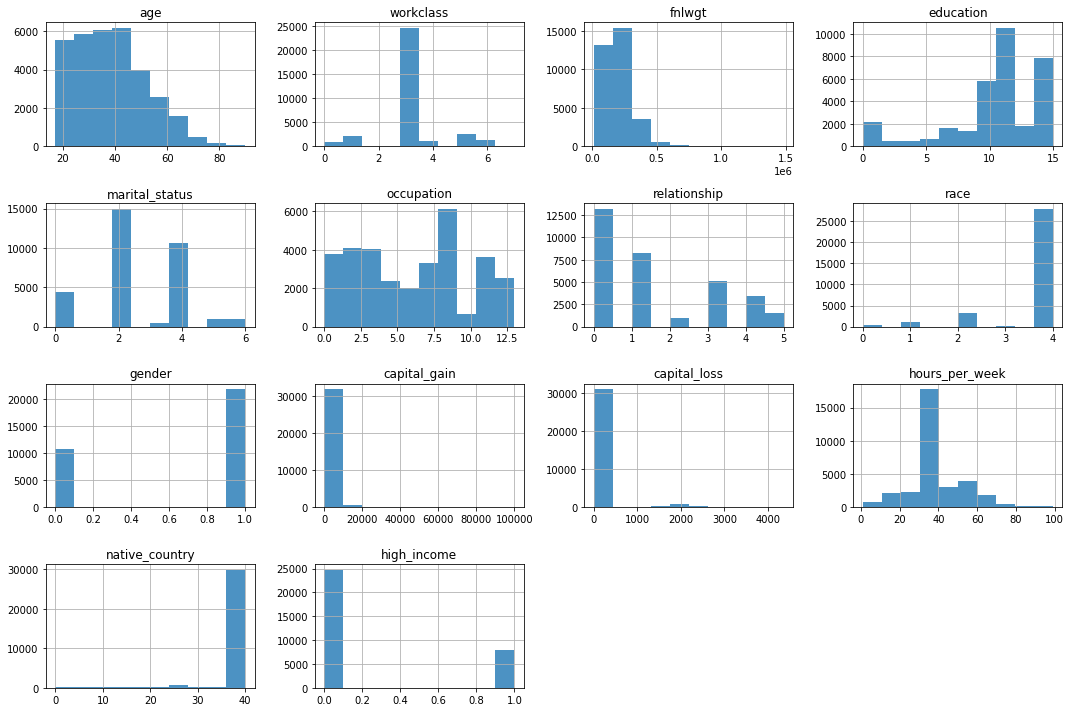

In [269]:
data.hist(alpha=0.8,figsize=(15,10))
plt.tight_layout()

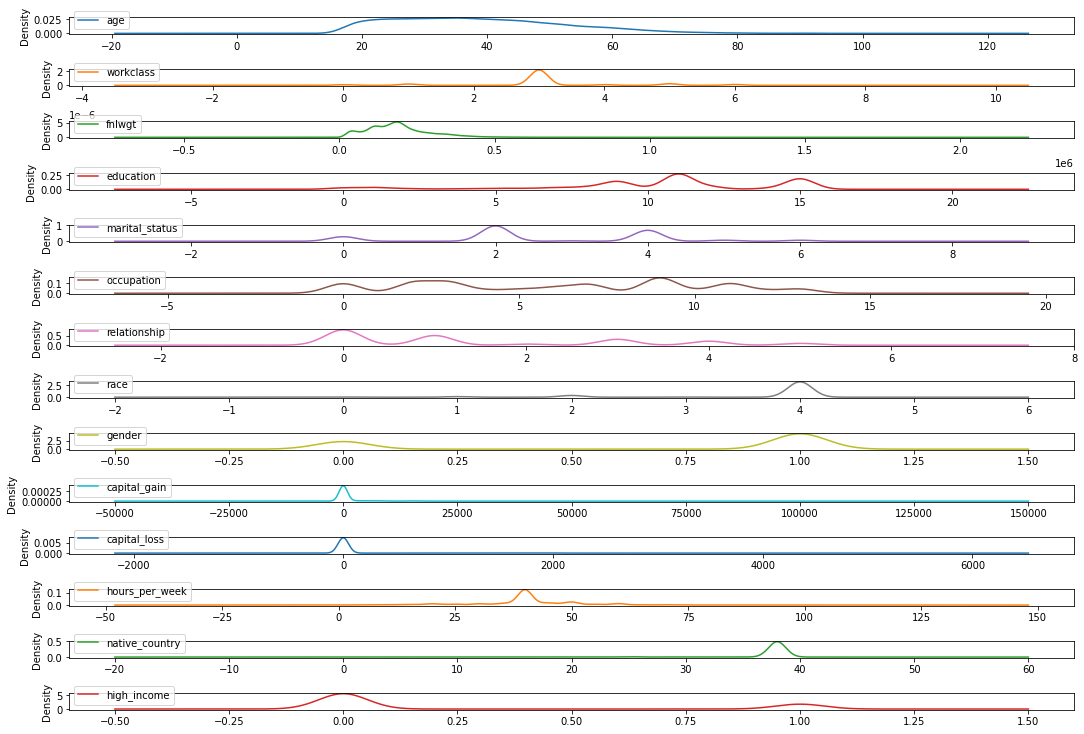

In [270]:
data.plot(kind="density",subplots=True,sharex=False,figsize=(15,10))
plt.tight_layout(pad=0.5)
plt.show()

<AxesSubplot:>

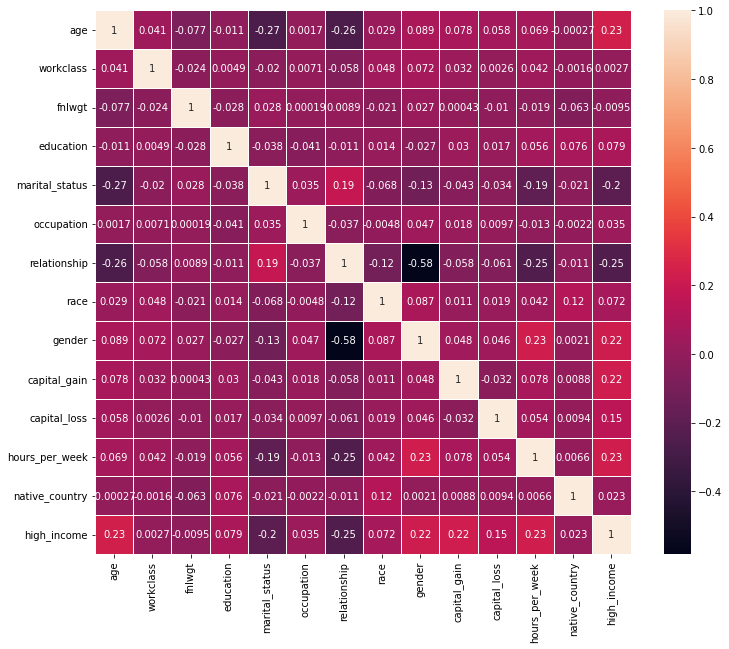

In [271]:
#heatmap
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(),annot=True, linewidths=0.8)

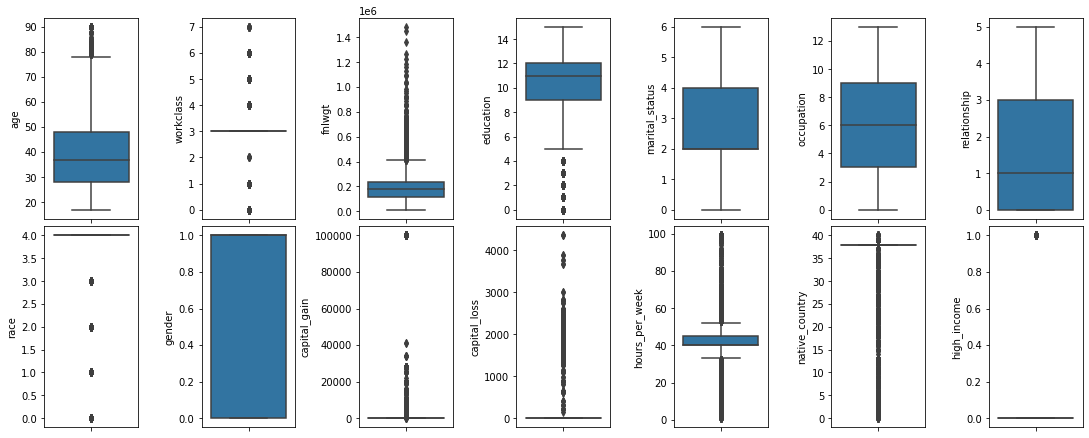

In [272]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(15, 6))
index = 0
axs = axs.flatten()
cols = ['age', 'workclass', 'fnlwgt', 'education',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'high_income']
for k in cols:
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4)

In [273]:
#outlier handling

outlier_cols = ["age","fnlwgt","education","capital_gain","capital_loss","hours_per_week"]

for i in outlier_cols:
    tenth_perc = np.percentile(data[i],10)
    ninetieth_perc = np.percentile(data[i],90)
    data[i] = np.where(data[i]>ninetieth_perc,ninetieth_perc,data[i])
    data[i] = np.where(data[i]<tenth_perc,tenth_perc,data[i])

In [274]:
data=data.drop(["capital_gain","capital_loss"],axis=1)

In [275]:
#splitting dataset
X = data.drop(["high_income"],axis=1)
Y = data["high_income"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [276]:
from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif,k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))

             Specs        Score
4    education_num  4119.100454
10  hours_per_week  2429.990350
0              age  2366.639395
7     relationship  2187.645828
9           gender  1593.107907
5   marital_status  1346.851776
8             race   169.898045
3        education    85.477564
6       occupation    39.080489
11  native_country    17.319964
2           fnlwgt     2.596225
1        workclass     0.236123


In [277]:
from sklearn.ensemble import RandomForestClassifier
# instantiate RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X,Y)

feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
# determine 20 most important features
df_imp_feat = feat_importances.nlargest(20)
print(df_imp_feat)

fnlwgt            0.209744
age               0.177710
relationship      0.113235
education_num     0.108766
hours_per_week    0.089180
occupation        0.084882
marital_status    0.079006
workclass         0.049592
education         0.038043
native_country    0.018611
race              0.018212
gender            0.013018
dtype: float64


In [278]:
from sklearn.model_selection import GridSearchCV
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(2, 20, 2)),
             'n_estimators': list(range(30, 200, 20))}

grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

# Fit the grid search model
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'n_estimators': [30, 50, 70, 90, 110, 130, 150, 170,
                                          190]})

In [279]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=14, n_estimators=130, random_state=1)

In [280]:
from sklearn.metrics import accuracy_score,precision_score
i=1
model = RandomForestClassifier(random_state=1, max_depth=14, n_estimators=130)
model.fit(x_train, y_train)   
y_pred = model.predict(x_test)
score = accuracy_score(y_test,y_pred)
pre_score = precision_score(y_test,y_pred)
print('accuracy_score',score)
print('precision_score',pre_score)

accuracy_score 0.8466577950660252
precision_score 0.6859205776173285


In [291]:
#bagging classifier

from sklearn.ensemble import BaggingClassifier
bgnclf = BaggingClassifier(n_estimators=4)

bgnclf.fit(x_train,y_train)

BaggingClassifier(n_estimators=4)

In [292]:
y_pred_bgnclf = bgnclf.predict(x_test)

In [293]:
score = accuracy_score(y_test,y_pred_bgnclf)
pre_score = precision_score(y_test,y_pred_bgnclf)
print('accuracy_score',score)
print('precision_score',pre_score)

accuracy_score 0.8099088954857201
precision_score 0.6063454759106933


In [294]:
from sklearn.linear_model import LogisticRegression
bgnclf = BaggingClassifier(base_estimator=LogisticRegression(max_iter=400),n_estimators=4)

bgnclf.fit(x_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=400),
                  n_estimators=4)

In [295]:
y_pred_bgnclf = bgnclf.predict(x_test)

In [296]:
score = accuracy_score(y_test,y_pred_bgnclf)
pre_score = precision_score(y_test,y_pred_bgnclf)
print('accuracy_score',score)
print('precision_score',pre_score)

accuracy_score 0.7638448152318559
precision_score 0.3698224852071006


best was random forest classifer then decision tree and finally logistic regressor among the three classifier for the given dataset